# Required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

# scanning the file to dataframe 

# check duplicated ?

In [2]:
df= pd.read_csv('project banking/Banking.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,?,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,?,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,?,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,?,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,?,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# check datatypes and nans by Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  object 
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [4]:
df.duplicated().isnull().sum()

0

# no of nan valuses in each coulmns 

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# drop unuseful columns 

In [6]:
df.drop(['RowNumber' , 'Surname'] , axis =1 , inplace =True)

In [7]:
df.drop(['CustomerId'] , axis =1 , inplace=True)

# now we will clean the data 

### Geography feature

In [8]:
df['Geography'].value_counts()

France     4988
Germany    2490
Spain      2466
?|           36
z||o         20
Name: Geography, dtype: int64

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany', '?|', 'z||o'], dtype=object)

In [10]:
def handle (x):
    if x in ['z||o','?|'] :
        return np.nan 
    else :
        return x

In [11]:
df['Geography']=df['Geography'].apply(handle)

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany', nan], dtype=object)

In [13]:
df['Geography'].isnull().sum()

56

In [14]:
df.isnull().sum()

CreditScore         0
Geography          56
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

### Gender feature

In [15]:
df['Gender'].unique()

array(['?', 'Male', 'Female', 'x?x'], dtype=object)

In [16]:
def handle (x):
    if x in ['x?x','?'] :
        return np.nan 
    else :
        return x

In [18]:
df['Gender']=df['Gender'].apply(handle)

In [19]:
df['Gender'].isnull().sum()

29

### CreditScore feature

In [20]:
df['CreditScore'].unique()

array(['619', '608', '502', '699', '850', '645', '822', '376', '501',
       '684', '528', '497', '476', '549', '635', '616', '653', '587',
       '726', '732', '636', '510', '669', '846', '577', '756', '571',
       '574', '411', '591', '533', '553', '520', '722', 'missed', '804',
       '582', '472', '465', '556', '776', '829', '637', '550', '698',
       '585', '788', '655', '601', '656', '725', '511', '614', '742',
       '687', '555', '603', '751', '581', '735', '661', '675', '738',
       '813', '657', '604', '519', '664', '678', '757', '416', '543',
       '506', '493', '652', '646', '647', '808', '524', '769', '730',
       '515', '773', '814', '710', '413', '665', '623', '670', '622',
       '785', '479', '685', '538', '562', '628', '668', '828', '674',
       '625', '432', '770', '758', '795', '686', '789', '589', '461',
       '584', '579', '663', '682', '793', '691', '485', '650', '754',
       '535', '716', '539', '706', '586', '717', '800', '683', '660',
       '704', '61

In [21]:
def handle (x):
    if x in ['missed',] :
        return np.nan 
    else :
        return x

In [22]:
df['CreditScore']=df['CreditScore'].apply(handle)

In [23]:
df['CreditScore'] = df['CreditScore'].astype(float)

In [24]:
df['CreditScore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: CreditScore
Non-Null Count  Dtype  
--------------  -----  
9964 non-null   float64
dtypes: float64(1)
memory usage: 78.2 KB


## univariant analysis 

In [25]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [26]:
num_fet = ['Exited' , 'EstimatedSalary' , 'IsActiveMember' , 'HasCrCard' , 'NumOfProducts' , 'Balance' , 'Tenure' ,'Age' , 'CreditScore']

### distripution for each numerical feature

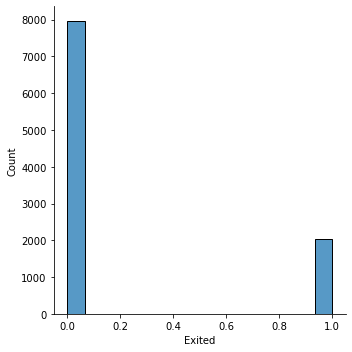

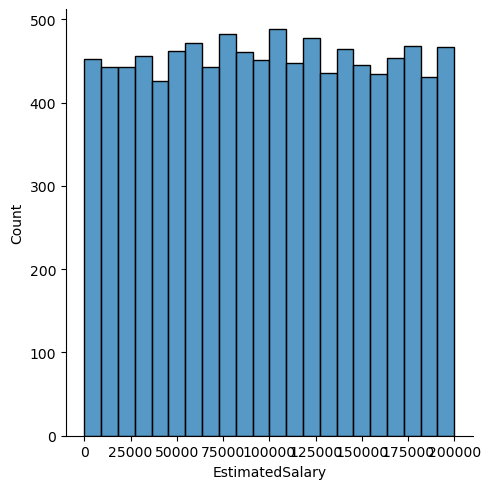

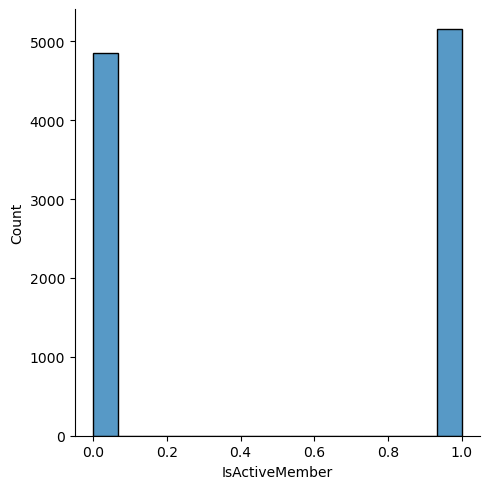

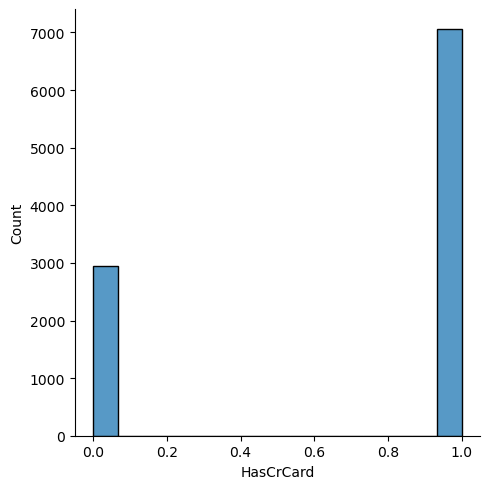

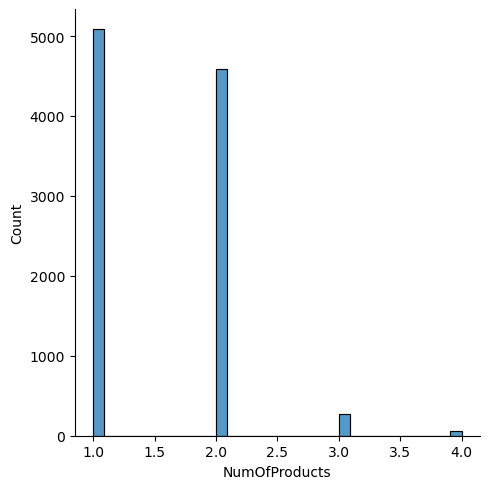

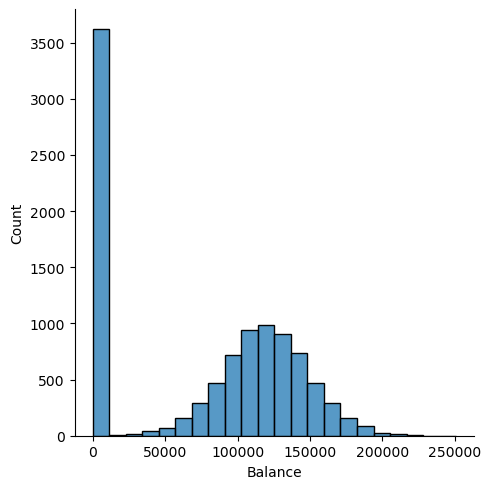

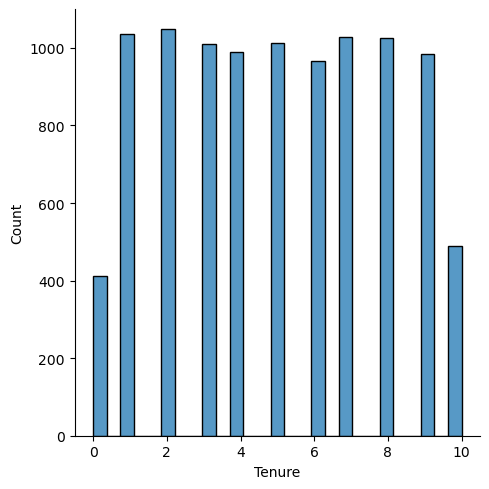

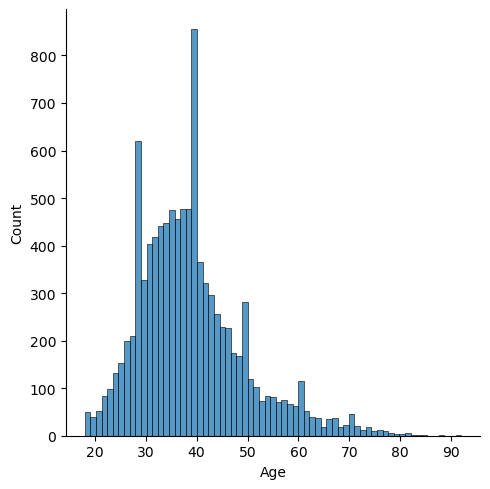

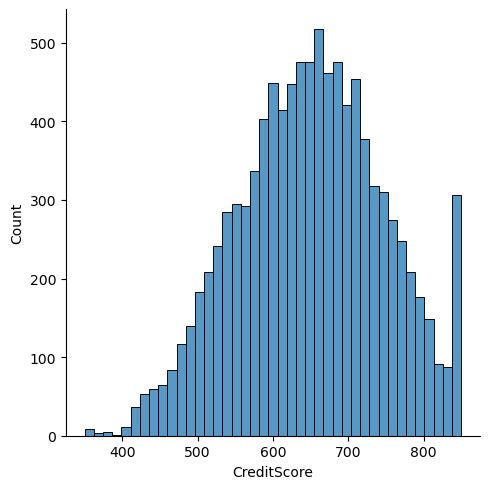

In [27]:
for i in num_fet:
    sns.displot(data = df , x=i)

# check outlires 

<AxesSubplot:xlabel='EstimatedSalary'>

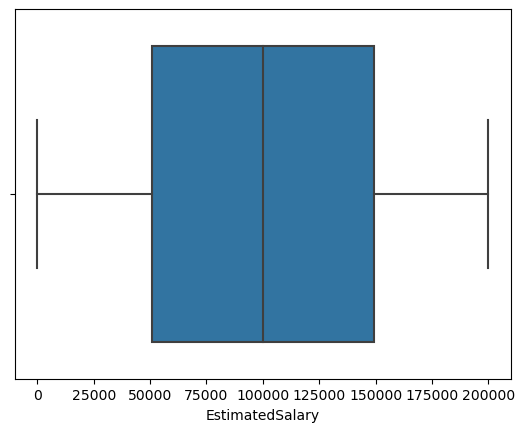

In [28]:
sns.boxplot(data = df , x='EstimatedSalary')

<AxesSubplot:xlabel='CreditScore'>

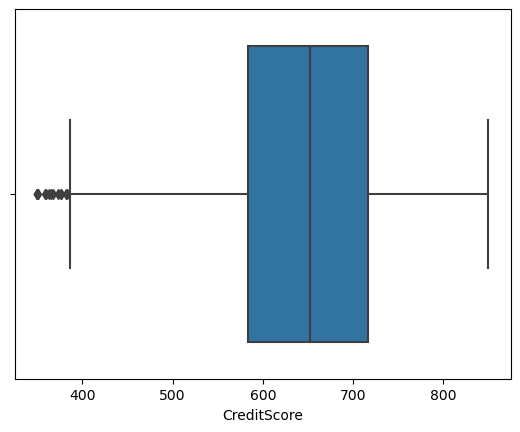

In [29]:
sns.boxplot(data = df , x='CreditScore')

<AxesSubplot:xlabel='Geography', ylabel='count'>

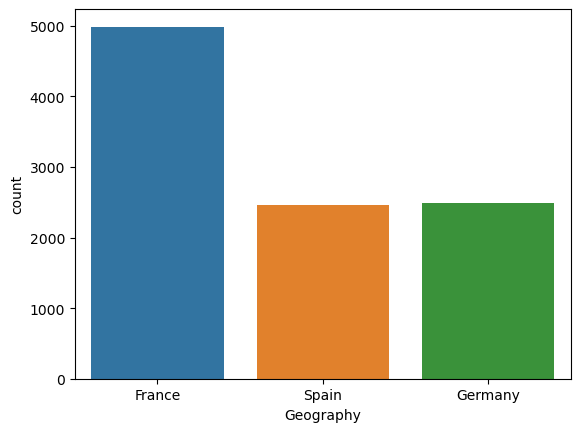

In [30]:
sns.countplot(data = df , x='Geography')

<AxesSubplot:xlabel='Gender', ylabel='count'>

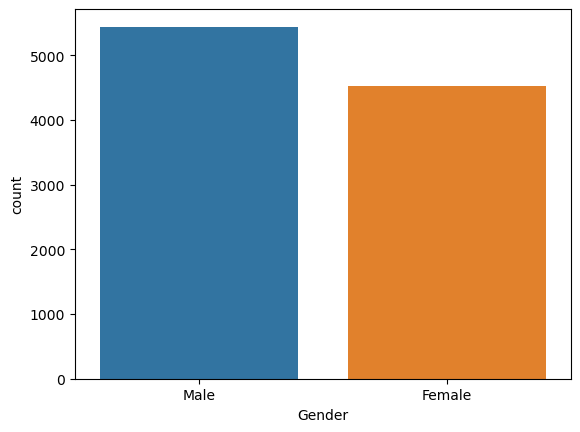

In [31]:
sns.countplot(data = df , x='Gender')

<AxesSubplot:xlabel='Age'>

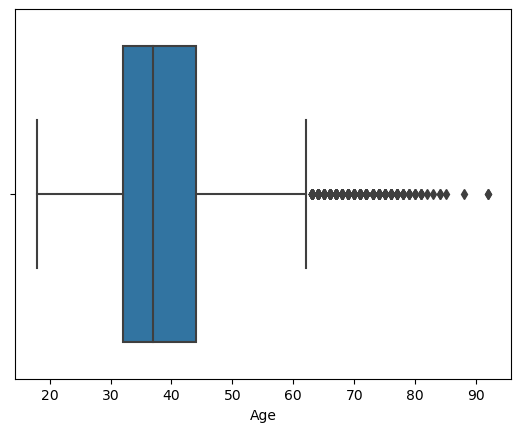

In [32]:
sns.boxplot(data = df , x='Age')

# drop agees more than 80

In [33]:
x=df[df['Age'] > 80].index

In [34]:
df.drop(x , axis =0 , inplace=True)

<AxesSubplot:xlabel='Age'>

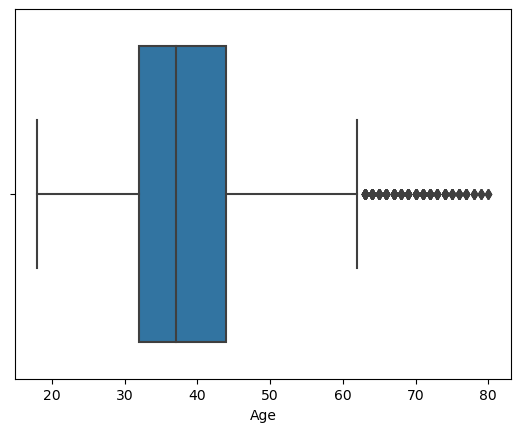

In [35]:
sns.boxplot(data = df , x='Age')

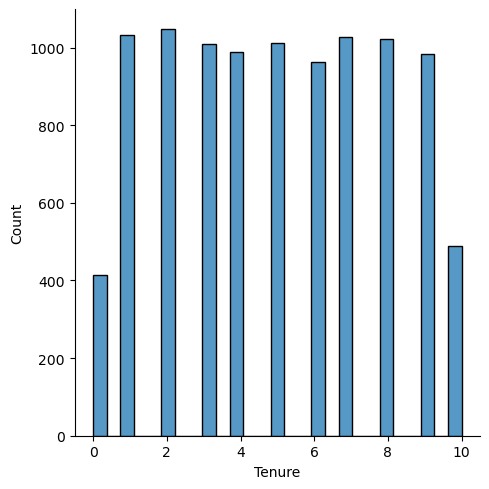

In [36]:
for i in ['Tenure']:
    sns.displot(data = df , x=i) 

In [37]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Balance'>

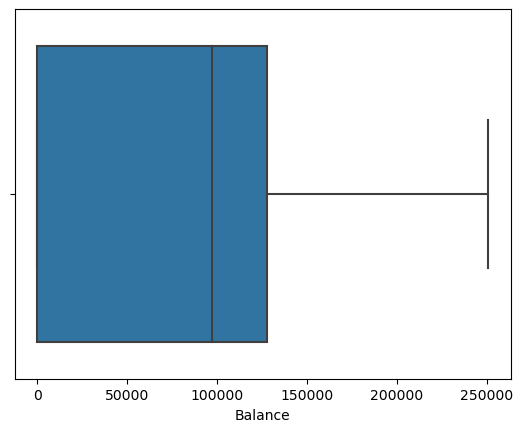

In [38]:
sns.boxplot(data = df , x='Balance')

In [39]:
df['Balance'].describe()

count      9988.000000
mean      76510.392653
std       62399.394235
min           0.000000
25%           0.000000
50%       97245.995000
75%      127660.767500
max      250898.090000
Name: Balance, dtype: float64

<AxesSubplot:xlabel='EstimatedSalary'>

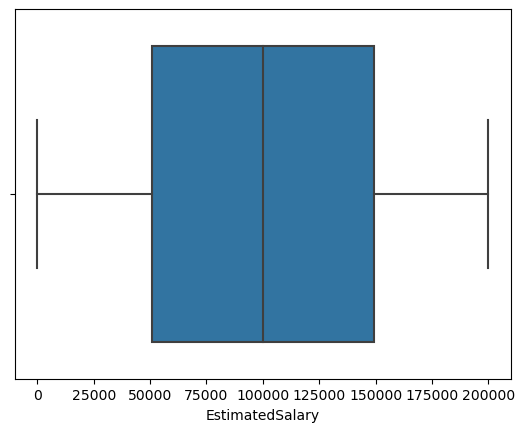

In [40]:
sns.boxplot(data = df , x='EstimatedSalary')

In [41]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# now we will start making model 

### Required libraries in sklearn

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate , RepeatedStratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import BayesianRidge

# we will implement model by Pipeline

### data preprocessing

In [43]:
categoricl=['Geography' , 'Gender']
num = ['CreditScore']

In [44]:
steps = list()
steps.append(("encoder" , BinaryEncoder())) #encoding categorical features 

In [45]:
pipeline = Pipeline(steps=steps)

In [46]:
col_transformer = ColumnTransformer([( "categ",pipeline ,categoricl )] 
                                    , remainder="passthrough") # transform features 

### Pipeline

In [47]:
## LogisticRegression better than KNN 
steps0 = list()
steps0.append(("transformer" , col_transformer))
steps0.append(("sclaer" ,StandardScaler()))
steps0.append(("poly" , PolynomialFeatures(degree=2)))
steps0.append(("model" , LogisticRegression(max_iter=100000000000)))

In [48]:
from sklearn import set_config
set_config(display="diagram")
big_one = Pipeline(steps=steps0)
big_one

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['Geography', 'Gender']),
                                                 ('numerical', KNNImputer(),
                                                  ['CreditScore'])])),
                ('sclaer', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LogisticRegression(max_iter=100000000000))])

In [49]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [50]:
cv = RepeatedStratifiedKFold(n_splits=10 , n_repeats=3 , random_state=1)

In [51]:
scores = cross_validate(big_one,x,y,cv = cv,scoring="accuracy",return_train_score=True )

D:\anaconda\envs\epsilon_eslam\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
D:\anaconda\envs\epsilon_eslam\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
D:\anaconda\envs\epsilon_eslam\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
D:\anaconda\envs\epsilon_eslam\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
D:\anaconda\envs\epsilon_eslam\lib\s

# Evaluating Model Performance

In [52]:
scores['train_score'].mean()

0.8605215281248665

In [53]:
scores['test_score'].mean()

0.8571298753663483

# fit the model

In [54]:
big_one.fit(x,y)

D:\anaconda\envs\epsilon_eslam\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['Geography', 'Gender']),
                                                 ('numerical', KNNImputer(),
                                                  ['CreditScore'])])),
                ('sclaer', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LogisticRegression(max_iter=100000000000))])

# save the model 

In [55]:
import joblib

In [56]:
joblib.dump(big_one , "banking.h5")
joblib.dump(x.columns,"input.h5")

['input.h5']

# depoly model by streamlit 

In [3]:
%%writefile Bankingclassfier.py


import pandas as pd 
import joblib
import streamlit as st


model = joblib.load('banking.h5')
inputs = joblib.load('input.h5')


def predict (CreditScore, Geography, Gender, Age, Tenure, Balance ,NumOfProducts , HasCrCard , IsActiveMember ,EstimatedSalary ):
    test_dataframe = pd.DataFrame(columns=inputs)
    test_dataframe.at[0, 'CreditScore'] = CreditScore
    test_dataframe.at[0, 'Geography'] =Geography
    test_dataframe.at[0, 'Gender'] =Gender
    test_dataframe.at[0, 'Age']=Age
    test_dataframe.at[0, 'Tenure']=Tenure
    test_dataframe.at[0,'Balance'] =Balance 
    test_dataframe.at[0,'NumOfProducts'] =NumOfProducts 
    test_dataframe.at[0,'HasCrCard'] = HasCrCard
    test_dataframe.at[0,'IsActiveMember'] = IsActiveMember
    test_dataframe.at[0,'EstimatedSalary'] =EstimatedSalary
    results = model.predict(test_dataframe)[0]
    return results

def main ():
    st.title("welcome to banking classfier project")
    CreditScore = st.slider('CreditScore' , min_value=350.000000 , max_value=850.000000 , value=400.000000 , step=20.000000)
    Geography = st.selectbox("Geography" ,['France', 'Germany', 'Spain'])
    Gender = st.selectbox('Gender' , ['Male' , 'Female'])
    Age = st.slider('Age' , min_value=18 , max_value=80 , value=20 , step=1)
    Tenure = st.slider('Tenure' , min_value=1.0 , max_value=8.0 , value=2.0 , step=0.5)
    Balance = st.slider('Balance' , min_value=0 , max_value=250000 , value= 50000 , step=2000)
    NumOfProducts = st.slider('NumOfProducts' , min_value=1 , max_value=5 , value=1 , step=1)
    HasCrCard = st.selectbox('HasCrCard' , [0 , 1])
    IsActiveMember = st.selectbox('IsActiveMember' , [0 , 1])
    EstimatedSalary = st.slider('EstimatedSalary' , min_value= 11.0 , max_value=199992.480000 , value = 20000.0 , step=200.0)
    
    
    if st.button('predict'):
        ans = predict(CreditScore, Geography, Gender, Age, Tenure, Balance ,NumOfProducts , HasCrCard , IsActiveMember ,EstimatedSalary )
        if ans == 0 :
            st.write("you are exited")
        else :
            st.write("you are not exited")
main() 

Overwriting Bankingclassfier.py


In [4]:
!streamlit run Bankingclassfier.py

^C
